<a href="https://colab.research.google.com/github/VigneshNaveen1311/MentalHealthProfile/blob/main/RM_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/RM/Vignesh Student Mental health.csv')

# Check for null values
print(df.isnull().sum())


Timestamp                                       6
Choose your gender                              6
Age                                             7
What is your course?                            6
Your current year of Study                      6
What is your CGPA?                              6
Marital status                                  6
Do you have Depression?                         6
Do you have Anxiety?                            6
Do you have Panic attack?                       6
Did you seek any specialist for a treatment?    6
dtype: int64


In [3]:
# Drop rows with null values
df.dropna(inplace=True)


In [4]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [9]:
# Remove outliers using the z-score method
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]


TypeError: ignored

In [7]:
df.head(10)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08-07-2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,08-07-2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08-07-2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08-07-2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08-07-2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,08-07-2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,08-07-2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,08-07-2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,08-07-2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,08-07-2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [8]:
df.describe()

,Age
count,494.000000
mean,19.598637
std,1.296448
min,18.000000
25%,18.887229
50%,19.359170
75%,19.898923
max,24.000000


In [10]:
# Print all column names
print(df.columns)

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')


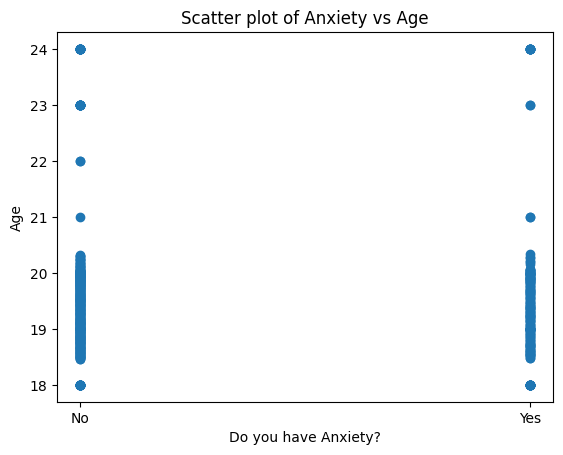

In [11]:
import matplotlib.pyplot as plt
# Create a scatter plot
plt.scatter(df['Do you have Anxiety?'], df['Age'])
plt.xlabel('Do you have Anxiety?')
plt.ylabel('Age')
plt.title('Scatter plot of Anxiety vs Age')
plt.show()

In [ ]:
# Create a bar chart
plt.bar(df['Do you have Anxiety?'], df['Count'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar chart of Categories')
plt.show()

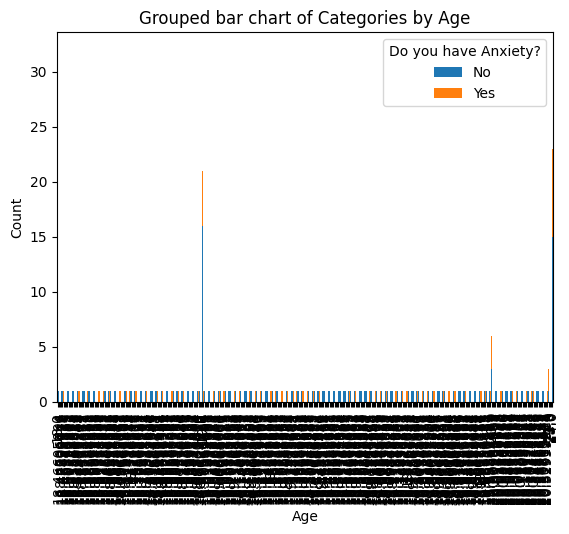

In [12]:
# Group the data by age and category
grouped = df.groupby(['Age', 'Do you have Anxiety?']).size().reset_index(name='Count')

# Pivot the data to create a matrix
pivoted = grouped.pivot(index='Age', columns='Do you have Anxiety?', values='Count')

# Create a grouped bar chart
ax = pivoted.plot(kind='bar', stacked=True)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Grouped bar chart of Categories by Age')
plt.show()

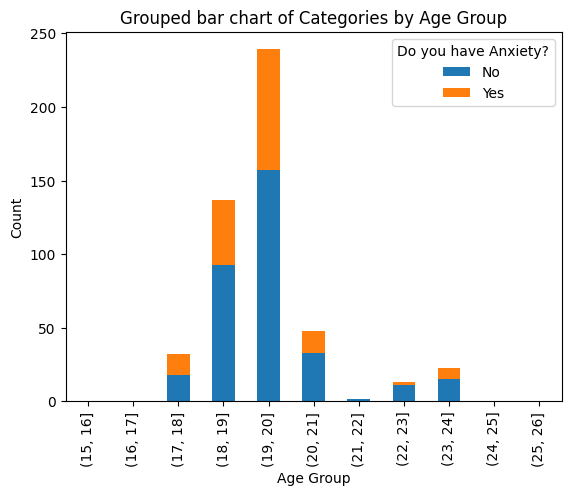

In [15]:
# Group the data by age and category
df['Age Group'] = pd.cut(df['Age'], bins=[15,16,17,18,19,20,21,22,23,24,25,26])
grouped = df.groupby(['Age Group', 'Do you have Anxiety?']).size().reset_index(name='Count')

# Pivot the data to create a matrix
pivoted = grouped.pivot(index='Age Group', columns='Do you have Anxiety?', values='Count')

# Create a grouped bar chart
ax = pivoted.plot(kind='bar', stacked=True)
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Grouped bar chart of Categories by Age Group')
plt.show()